<a href="https://colab.research.google.com/github/PRsant90/Challenge_datos_2_parte_2/blob/main/Telecomx_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar liberias

In [ ]:
# Instalar la librer√≠a imblearn
%pip install imblearn

# Importar las librer√≠as necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

Cargar datos anteriores

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data challenge 2 parte 2/df_final parte 1.csv')
df

id  cancelacion  genero  mayor_de_65  pareja  dependientes  \
0     0002-ORFBO            0  female            0       1             1   
1     0003-MKNFE            0    male            0       0             0   
2     0004-TLHLJ            1    male            0       0             0   
3     0011-IGKFF            1    male            1       1             0   
4     0013-EXCHZ            1  female            1       1             0   
...          ...          ...     ...          ...     ...           ...   
7038  9987-LUTYD            0  female            0       0             0   
7039  9992-RRAMN            1    male            0       1             0   
7040  9992-UJOEL            0    male            0       0             0   
7041  9993-LHIEB            0    male            0       1             1   
7042  9995-HOTOH            0    male            0       1             1   

      meses_de_contrato  servicio_telefonico  lineas_multiples  \
0                   9.0                    1                 0   
1                   9.0                    1                 1   
2                   4.0                    1                 0   
3                  13.0                    1                 0   
4                   3.0                    1                 0   
...                 ...                  ...               ...   
7038               13.0                    1                 0   
7039               22.0                    1                 1   
7040                2.0                    1                 0   
7041               67.0                    1                 0   
7042               63.0                    0                 0   

     servicio_internet  ...  soporte_tecnico  servicio_tv  servicio_peliculas  \
0                  dsl  ...                1            1                   0   
1                  dsl  ...                0            0                   1   
2          fiber optic  ...                0            0                   0   
3          fiber optic  ...                0            1                   1   
4          fiber optic  ...                1            1                   0   
...                ...  ...              ...          ...                 ...   
7038               dsl  ...                1            0                   0   
7039       fiber optic  ...                0            0                   1   
7040               dsl  ...                0            0                   0   
7041               dsl  ...                1            0                   1   
7042               dsl  ...                0            1                   1   

       tipo_contrato  facturas_electronicas       metodo_pago  \
0           one year                      1      mailed check   
1     month-to-month                      0      mailed check   
2     month-to-month                      1  electronic check   
3     month-to-month                      1  electronic check   
4     month-to-month                      1      mailed check   
...              ...                    ...               ...   
7038        one year                      0      mailed check   
7039  month-to-month                      1  electronic check   
7040  month-to-month                      1      mailed check   
7041        two year                      0      mailed check   
7042        two year                      0  electronic check   

     total_pagos_mensuales  ingreso_total_cliente cuentas_diarias  \
0                    65.60                 593.30        2.186667   
1                    59.90                 542.40        1.996667   
2                    73.90                 280.85        2.463333   
3                    98.00                1237.85        3.266667   
4                    83.90                 267.40        2.796667   
...                    ...                    ...             ...   
7038                 55.15                 742.90        1.838333   
70

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     7043 non-null   object 
 1   cancelacion            7043 non-null   int64  
 2   genero                 7043 non-null   object 
 3   mayor_de_65            7043 non-null   int64  
 4   pareja                 7043 non-null   int64  
 5   dependientes           7043 non-null   int64  
 6   meses_de_contrato      7043 non-null   float64
 7   servicio_telefonico    7043 non-null   int64  
 8   lineas_multiples       7043 non-null   int64  
 9   servicio_internet      7043 non-null   object 
 10  seguridad_en_linea     7043 non-null   int64  
 11  Soporte_en_linea       7043 non-null   int64  
 12  protecc_disp           7043 non-null   int64  
 13  soporte_tecnico        7043 non-null   int64  
 14  servicio_tv            7043 non-null   int64  
 15  serv

Eliminaci√≥n de columnas Irrelevantes para el analisis o modelo predictivo


##Las columnas que no son relevantes para este analisis o que no tienen impacto son:##

- Ingreso total cliente.
  Suele ser simplemente meses_de_contrato * total_pagos_mensuales. Es redundante.

- tiempo_de_contrato:
  Es una transformaci√≥n directa de meses_de_contrato (quiz√° en a√±os o meses normalizados). Si es as√≠, tambi√©n se puede eliminar.

- cuentas_diarias:
  M√©trica derivada (por ejemplo, ingreso_total_cliente / d√≠as_contratados). Habr√≠a que revisar, pero en muchos casos es solo una variable calculada a partir de otras.

In [ ]:
columnas_irrelevantes = [
    'id',
    'ingreso_total_cliente',
    'tiempo_de_contrato',
    'cuentas_diarias'
]
df = df.drop(columns=columnas_irrelevantes)

print(df.columns.tolist())

['cancelacion', 'genero', 'mayor_de_65', 'pareja', 'dependientes', 'meses_de_contrato', 'servicio_telefonico', 'lineas_multiples', 'servicio_internet', 'seguridad_en_linea', 'Soporte_en_linea', 'protecc_disp', 'soporte_tecnico', 'servicio_tv', 'servicio_peliculas', 'tipo_contrato', 'facturas_electronicas', 'metodo_pago', 'total_pagos_mensuales']


One hot encoding

In [ ]:
cat_cols = ['genero', 'servicio_internet', 'tipo_contrato', 'metodo_pago']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

print(df.head())
print(df.columns)

   cancelacion  mayor_de_65  pareja  dependientes  meses_de_contrato  \
0            0            0       1             1                9.0   
1            0            0       0             0                9.0   
2            1            0       0             0                4.0   
3            1            1       1             0               13.0   
4            1            1       1             0                3.0   

   servicio_telefonico  lineas_multiples  seguridad_en_linea  \
0                    1                 0                   0   
1                    1                 1                   0   
2                    1                 0                   0   
3                    1                 0                   0   
4                    1                 0                   0   

   Soporte_en_linea  protecc_disp  ...  facturas_electronicas  \
0                 1             0  ...                      1   
1                 0             0  ...              

In [ ]:
df = df.rename(columns={'genero_male': 'genero'})
print(df.columns)

Index(['cancelacion', 'mayor_de_65', 'pareja', 'dependientes',
       'meses_de_contrato', 'servicio_telefonico', 'lineas_multiples',
       'seguridad_en_linea', 'Soporte_en_linea', 'protecc_disp',
       'soporte_tecnico', 'servicio_tv', 'servicio_peliculas',
       'facturas_electronicas', 'total_pagos_mensuales', 'genero',
       'servicio_internet_fiber optic', 'servicio_internet_no',
       'tipo_contrato_one year', 'tipo_contrato_two year',
       'metodo_pago_credit card (automatic)', 'metodo_pago_electronic check',
       'metodo_pago_mailed check'],
      dtype='object')


In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
print(df.dtypes)

cancelacion                              int64
mayor_de_65                              int64
pareja                                   int64
dependientes                             int64
meses_de_contrato                      float64
servicio_telefonico                      int64
lineas_multiples                         int64
seguridad_en_linea                       int64
Soporte_en_linea                         int64
protecc_disp                             int64
soporte_tecnico                          int64
servicio_tv                              int64
servicio_peliculas                       int64
facturas_electronicas                    int64
total_pagos_mensuales                  float64
genero                                   int64
servicio_internet_fiber optic            int64
servicio_internet_no                     int64
tipo_contrato_one year                   int64
tipo_contrato_two year                   int64
metodo_pago_credit card (automatic)      int64
metodo_pago_e

Verificaci√≥n de la Proporci√≥n de Cancelaci√≥n (Churn)

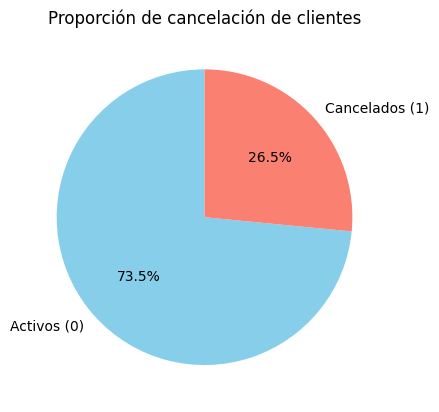

In [ ]:
# Contar cantidad de clientes que cancelaron (1) y que permanecieron (0)
conteo = df['cancelacion'].value_counts()

# Mostrar proporci√≥n
proporcion = df['cancelacion'].value_counts(normalize=True)

plt.pie(proporcion,
        labels=['Activos (0)', 'Cancelados (1)'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'salmon'])

plt.title('Proporci√≥n de cancelaci√≥n de clientes')
plt.show()


#Como vimos en el analisis del challenge anterior existe una preocupante salida de clientes de la empresa.

Analisis de correlaciones


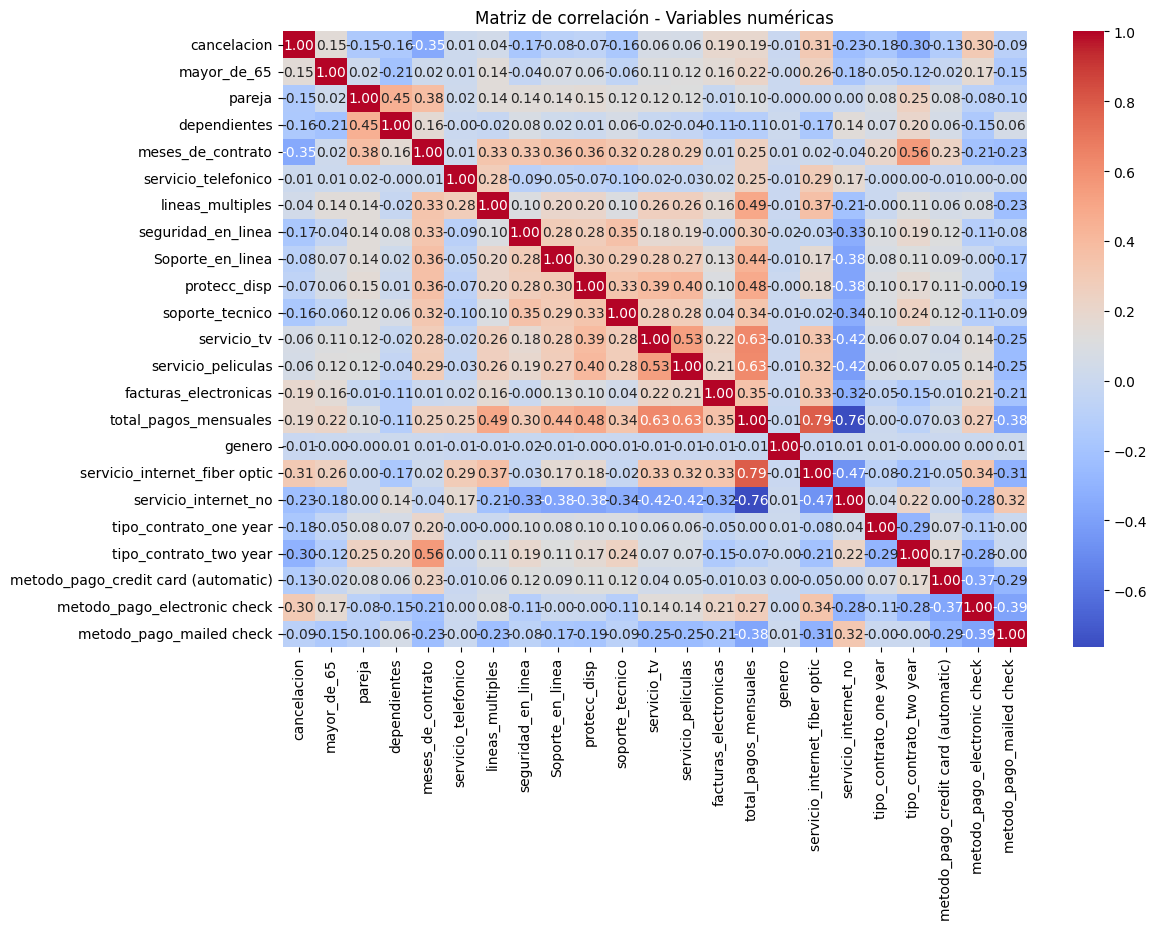

Correlaci√≥n con cancelacion:
cancelacion                            1.000000
servicio_internet_fiber optic          0.308020
metodo_pago_electronic check           0.301919
total_pagos_mensuales                  0.193356
facturas_electronicas                  0.191825
mayor_de_65                            0.150889
servicio_tv                            0.063228
servicio_peliculas                     0.061382
lineas_multiples                       0.040102
servicio_telefonico                    0.011942
genero                                -0.008612
protecc_disp                          -0.066160
Soporte_en_linea                      -0.082255
metodo_pago_mailed check              -0.091683
metodo_pago_credit card (automatic)   -0.134302
pareja                                -0.150448
dependientes                          -0.164221
soporte_tecnico                       -0.164674
seguridad_en_linea                    -0.171226
tipo_contrato_one year                -0.177820
servicio_i

In [ ]:
# 1) Seleccionar solo columnas num√©ricas
df_num = df.select_dtypes(include=['int64', 'float64'])

# 2) Calcular correlaci√≥n
corr = df_num.corr()

# 3) Visualizar matriz completa
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlaci√≥n - Variables num√©ricas")
plt.show()

# 4) Ver correlaci√≥n de cada variable con 'cancelacion'
print("Correlaci√≥n con cancelacion:")
print(corr['cancelacion'].sort_values(ascending=False))

las variables que seleccion√© ‚Äîcomo los meses de contrato, el tipo de contrato, el monto de los pagos mensuales, el servicio de internet y el m√©todo de pago‚Äî son las que muestran una relaci√≥n m√°s marcada con la cancelaci√≥n. En resumen, se ve que quienes tienen contratos m√°s largos suelen mantenerse, mientras que los clientes con pagos m√°s altos, los que usan fibra √≥ptica o los que pagan con electronic check tienden a cancelar con m√°s frecuencia. Las eleg√≠ porque no solo tienen una correlaci√≥n clara en los datos, sino que adem√°s encajan con lo que uno esperar√≠a en la realidad del negocio.

Analisis dirigido

Tiempo de contrato vs cancelaci√≥n

En el boxplot se observa que los clientes que cancelan suelen tener contratos m√°s cortos, mientras que quienes permanecen activos tienden a acumular m√°s meses de servicio. Esto refleja que la antig√ºedad y la duraci√≥n del contrato son factores protectores frente a la cancelaci√≥n: a mayor tiempo de relaci√≥n, menor propensi√≥n a irse.

/tmp/ipython-input-1357428067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancelacion', y='meses_de_contrato', data=df, palette="Set2")


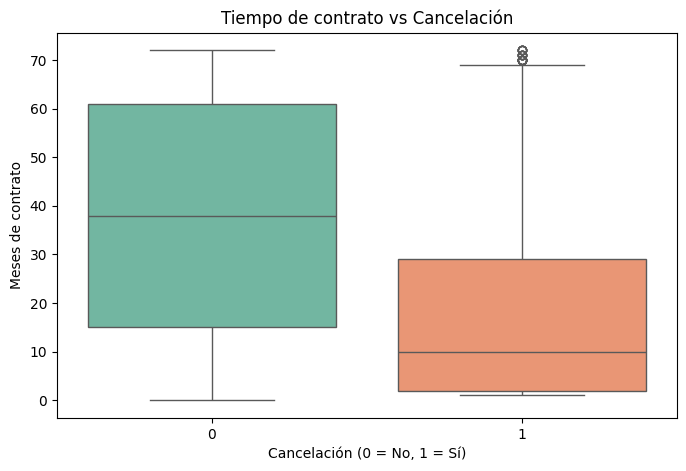

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cancelacion', y='meses_de_contrato', data=df, palette="Set2")
plt.title("Tiempo de contrato vs Cancelaci√≥n")
plt.xlabel("Cancelaci√≥n (0 = No, 1 = S√≠)")
plt.ylabel("Meses de contrato")
plt.show()

Pagos mensuales vs Cancelaci√≥n

El an√°lisis muestra que los clientes con facturas mensuales m√°s altas presentan una mayor probabilidad de cancelar. En cambio, los clientes con pagos m√°s bajos tienden a mantenerse. Esto sugiere que el costo del servicio influye de manera importante en la decisi√≥n de abandonar.

/tmp/ipython-input-1538669221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cancelacion', y='total_pagos_mensuales', data=df, palette="Set3")


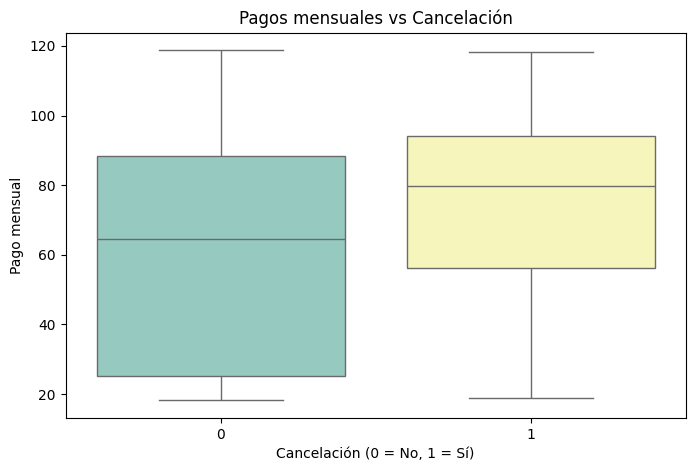

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cancelacion', y='total_pagos_mensuales', data=df, palette="Set3")
plt.title("Pagos mensuales vs Cancelaci√≥n")
plt.xlabel("Cancelaci√≥n (0 = No, 1 = S√≠)")
plt.ylabel("Pago mensual")
plt.show()

 Tiempo de contrato vs Gasto mensual. Con Scatter plot

Este lo agregue con el fin de  de ver si mejores los patrones combinados. Como por ejemplo el de contratos cortos y facturas mas altas. Son lo que mas se van.

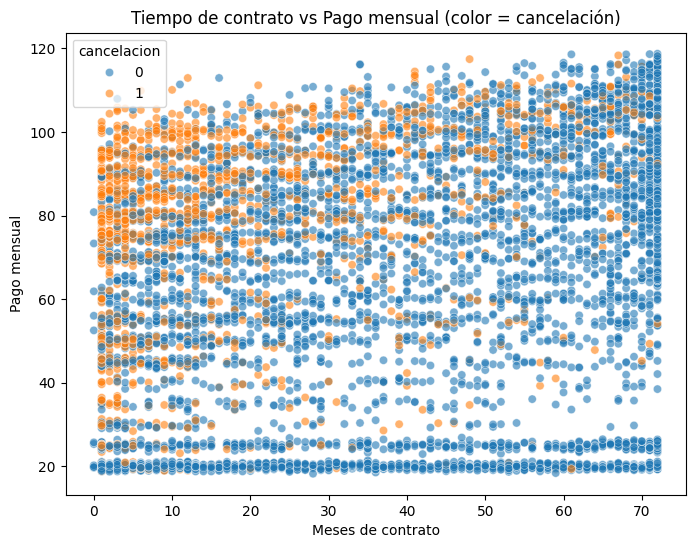

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='meses_de_contrato', y='total_pagos_mensuales', hue='cancelacion', data=df, alpha=0.6)
plt.title("Tiempo de contrato vs Pago mensual (color = cancelaci√≥n)")
plt.xlabel("Meses de contrato")
plt.ylabel("Pago mensual")
plt.show()

#Separaci√≥n de Datos#

Creaci√≥n de modelos de entrenamiento

In [ ]:
X = df.drop(columns=['cancelacion'])
y = df['cancelacion']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Tama√±o entrenamiento:", X_train.shape[0])
print("Tama√±o prueba:", X_test.shape[0])

Tama√±o entrenamiento: 4930
Tama√±o prueba: 2113


#Balanceo de datos con SMOTE#

In [ ]:
sm = SMOTE(random_state=42, k_neighbors=5)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Distribuci√≥n original en y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribuci√≥n balanceada en y_train_res:")
print(y_train_res.value_counts(normalize=True))

Distribuci√≥n original en y_train:
cancelacion
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Distribuci√≥n balanceada en y_train_res:
cancelacion
0    0.5
1    0.5
Name: proportion, dtype: float64


#Creaci√≥n de modelos#

Baseline

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train_res, y_train_res)

# Evaluar en el test original
y_pred_base = baseline.predict(X_test)

baseline.score(X_test, y_test)

0.73450070989115

In [ ]:
print("üìå Baseline (Siempre predice clase mayoritaria)")
print(classification_report(y_test, y_pred_base, digits=3, zero_division=1))

üìå Baseline (Siempre predice clase mayoritaria)
              precision    recall  f1-score   support

           0      0.735     1.000     0.847      1552
           1      1.000     0.000     0.000       561

    accuracy                          0.735      2113
   macro avg      0.867     0.500     0.423      2113
weighted avg      0.805     0.735     0.622      2113



1) Modelo con Regresi√≥n logistica y normalizado

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Pipeline: Normalizaci√≥n + Modelo
log_reg_modelo = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, random_state=42))
])

log_reg_modelo.fit(X_train_res, y_train_res)

log_reg_modelo.score(X_train_res, y_train_res)




0.8259249033683048

In [ ]:
y_pred_log = log_reg_modelo.predict(X_test)
print("üìå Regresi√≥n Log√≠stica")
print(classification_report(y_test, y_pred_log, digits=3))

üìå Regresi√≥n Log√≠stica
              precision    recall  f1-score   support

           0      0.873     0.787     0.828      1552
           1      0.537     0.684     0.602       561

    accuracy                          0.760      2113
   macro avg      0.705     0.736     0.715      2113
weighted avg      0.784     0.760     0.768      2113



2) Modelo Random Forest (Sin Normalizar)

In [ ]:
rf_modelo = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced_subsample",  # Ayuda con el desbalance
    n_jobs=-1
)
rf_modelo.fit(X_train_res, y_train_res)

rf_modelo.score(X_train_res, y_train_res)

0.9983434566537824

In [ ]:
y_pred_rf = rf_modelo.predict(X_test)
print("üìå Random Forest")
print(classification_report(y_test, y_pred_rf, digits=3))

üìå Random Forest
              precision    recall  f1-score   support

           0      0.842     0.823     0.832      1552
           1      0.539     0.572     0.555       561

    accuracy                          0.756      2113
   macro avg      0.690     0.698     0.694      2113
weighted avg      0.761     0.756     0.759      2113



2a) Randomforest con Hiperparametros

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Definimos el bosque base
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"
)

# Espacio de b√∫squeda
param_dist = {
    "n_estimators": [200, 300, 400, 600],
    "max_depth": [None, 6, 8, 10, 12, 16],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", "log2", None]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring="f1",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Entrenamos sobre el TRAIN balanceado con SMOTE
search.fit(X_train_res, y_train_res)

print("Mejores hiperpar√°metros:", search.best_params_)
best_rf = search.best_estimator_

# Evaluaci√≥n en TEST (distribuci√≥n real)
y_pred_rf = best_rf.predict(X_test)
print("\nüìå Random Forest (mejor modelo tras b√∫squeda):")
print(classification_report(y_test, y_pred_rf, digits=3))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores hiperpar√°metros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 12}

üìå Random Forest (mejor modelo tras b√∫squeda):
              precision    recall  f1-score   support

           0      0.867     0.787     0.825      1552
           1      0.530     0.665     0.590       561

    accuracy                          0.754      2113
   macro avg      0.698     0.726     0.707      2113
weighted avg      0.777     0.754     0.762      2113



In [98]:
best_rf.score(X_test, y_test)

0.7543776620918126

3) Arbol de Desiciones

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced",
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=4
)
dt.fit(X_train_res, y_train_res)

y_pred_dt = dt.predict(X_test)

dt.score(X_test, y_test)

0.7103644107903455

In [100]:

print("üìå √Årbol de Decisi√≥n (profundidad controlada)")
print(classification_report(y_test, y_pred_dt, digits=3))

üìå √Årbol de Decisi√≥n (profundidad controlada)
              precision    recall  f1-score   support

           0      0.890     0.691     0.778      1552
           1      0.472     0.763     0.583       561

    accuracy                          0.710      2113
   macro avg      0.681     0.727     0.681      2113
weighted avg      0.779     0.710     0.726      2113



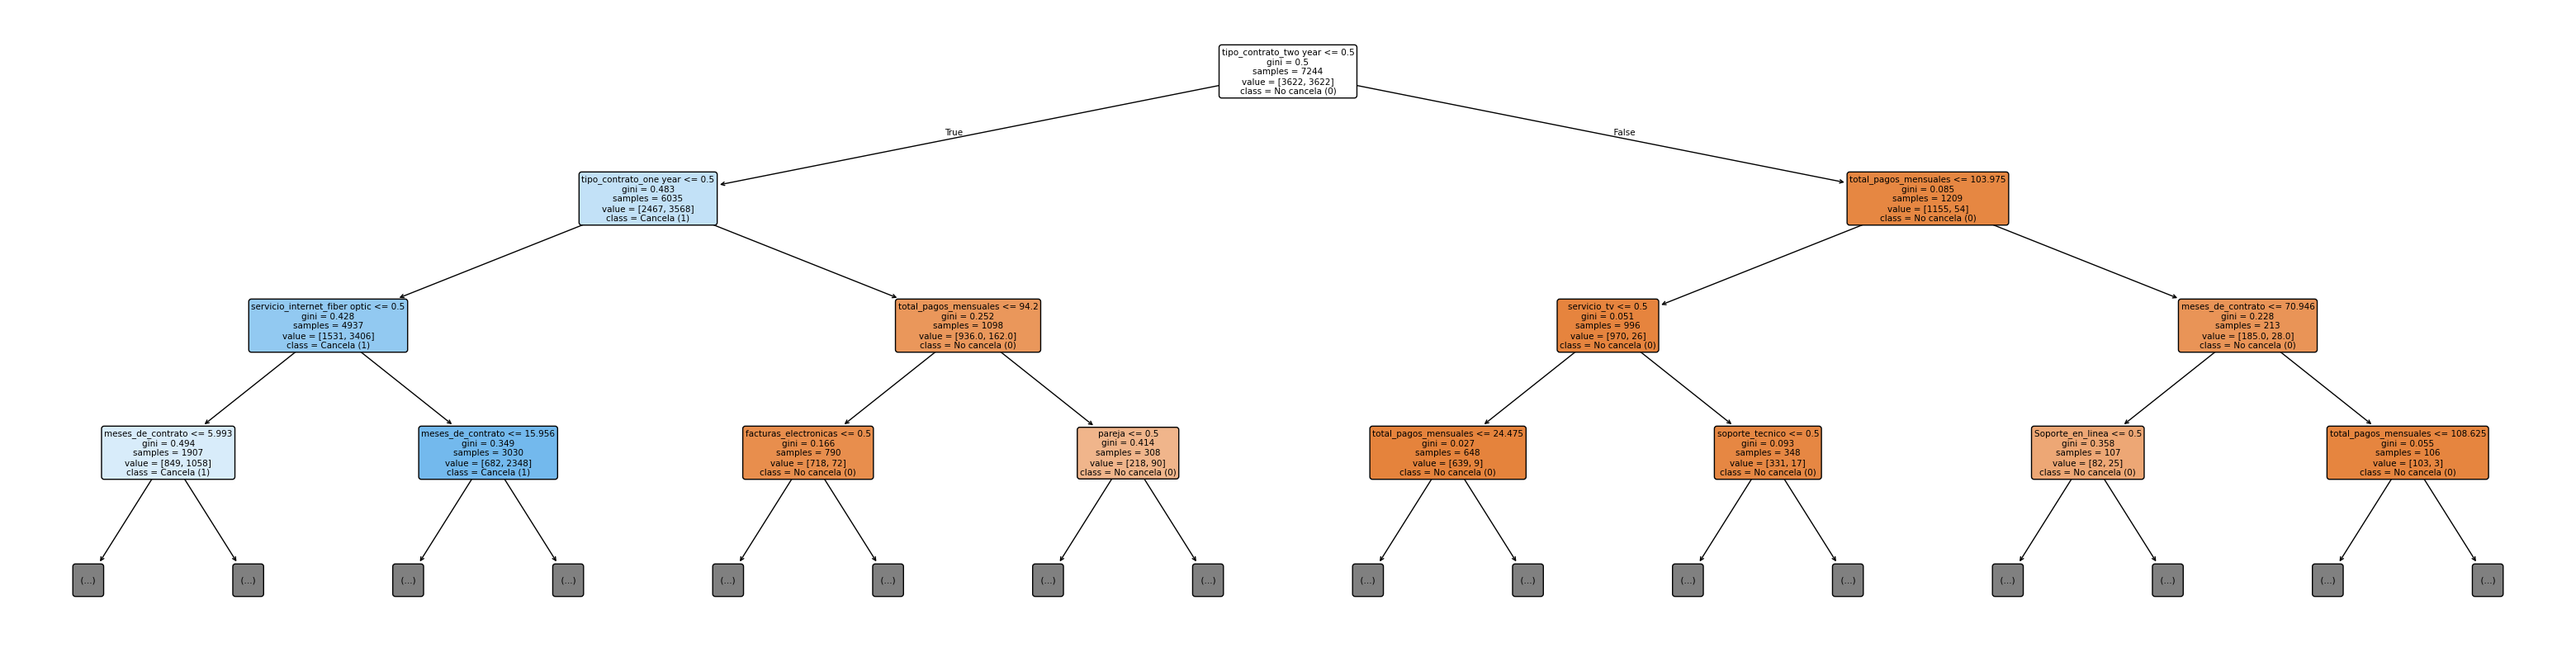

In [101]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(40, 10))
tree.plot_tree(
    dt,
    feature_names=X_train_res.columns,
    class_names=["No cancela (0)", "Cancela (1)"],
    filled=True,
    rounded=True,
    max_depth=3
)
plt.show()


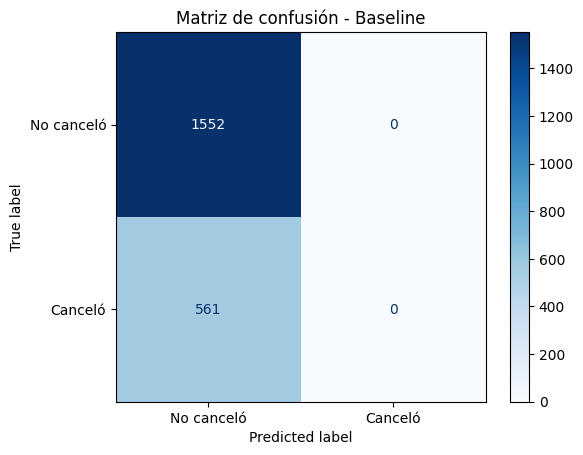

<Figure size 640x480 with 0 Axes>

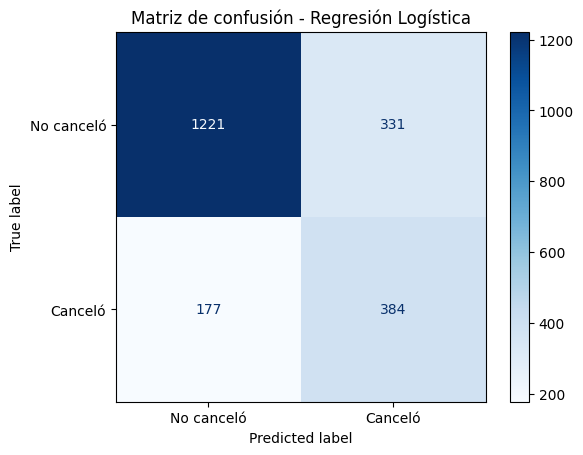

<Figure size 640x480 with 0 Axes>

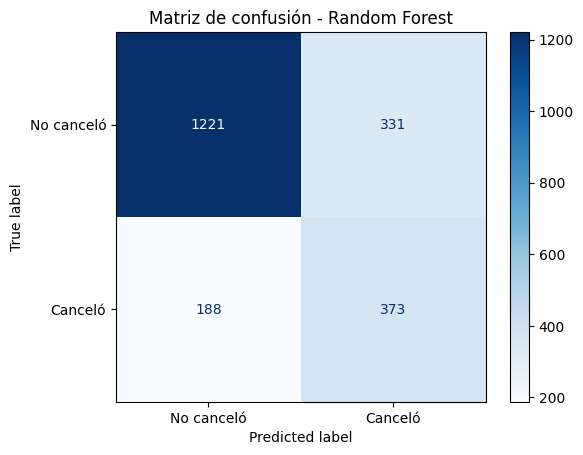

<Figure size 640x480 with 0 Axes>

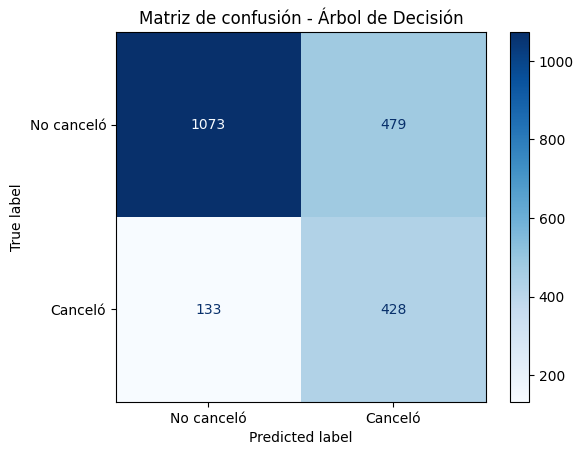

                Modelo  Accuracy  Precisi√≥n    Recall  F1-score
0             Baseline  0.734501   0.000000  0.000000  0.000000
1  Regresi√≥n Log√≠stica  0.759584   0.537063  0.684492  0.601881
2        Random Forest  0.754378   0.529830  0.664884  0.589723
3    √Årbol de Decisi√≥n  0.710364   0.471885  0.762923  0.583106


<Figure size 640x480 with 0 Axes>

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

modelos = {
    "Baseline": baseline,
    "Regresi√≥n Log√≠stica": log_reg_modelo,
    "Random Forest": best_rf,
    "√Årbol de Decisi√≥n": dt
}

resultados = []

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    resultados.append([nombre, acc, prec, rec, f1])

    # Matriz de confusi√≥n
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No cancel√≥", "Cancel√≥"])
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de confusi√≥n - {nombre}")
    plt.show()
    plt.savefig("/content/drive/MyDrive/data challenge 2 parte 2/matriz_confusion.png", dpi=300, bbox_inches="tight")
import pandas as pd
df_resultados = pd.DataFrame(resultados, columns=["Modelo","Accuracy","Precisi√≥n","Recall","F1-score"])
print(df_resultados)


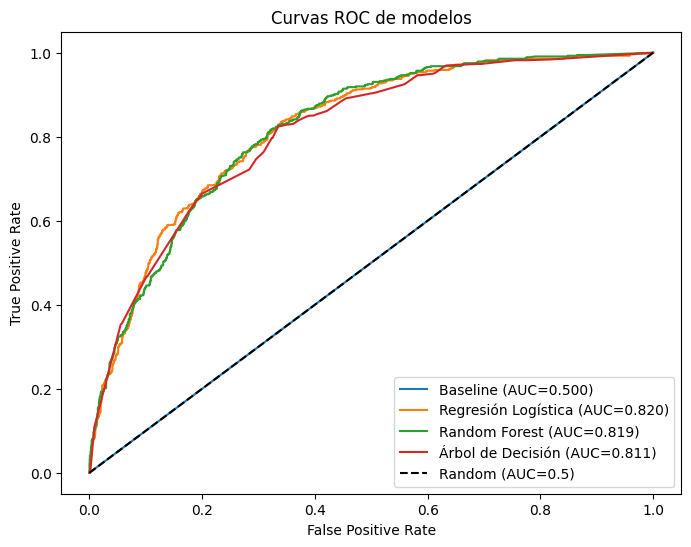

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for nombre, modelo in modelos.items():

    if hasattr(modelo, "predict_proba"):
        y_proba = modelo.predict_proba(X_test)[:,1]
    else:

        y_proba = modelo.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC={auc:.3f})")


plt.plot([0,1],[0,1],'k--',label="Random (AUC=0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC de modelos")
plt.legend(loc="lower right")
plt.savefig("/content/drive/MyDrive/data challenge 2 parte 2/Curvas_ROC.png", dpi=300, bbox_inches="tight")
plt.show()


üìå Conclusi√≥n general

Tras comparar los modelos:

-La baseline confirma que el accuracy es enga√±oso en datos desbalanceados.

-La regresi√≥n log√≠stica no solo aporta interpretabilidad, sino que adem√°s mostr√≥ el mejor AUC (0.820) y un F1 competitivo, lo que la hace muy estable y confiable.

-El √°rbol de decisi√≥n ofrece reglas claras y un recall alto, pero depende mucho de los par√°metros y tiende a sobreajustar.

-El Random Forest logr√≥ un buen balance entre recall y precisi√≥n, pero qued√≥ levemente por debajo en AUC frente a la regresi√≥n.

üìå Elecci√≥n final: La Regresi√≥n Log√≠stica se considera el mejor modelo en esta comparaci√≥n, ya que logra el AUC m√°s alto y un rendimiento global estable. Sin embargo, el Random Forest sigue siendo una alternativa s√≥lida, y con mayor ajuste de hiperpar√°metros podr√≠a incluso superarla.

#Otros modelos Adicionales (KNN, SVM y XGBoost)#

üîπ 1. KNN (K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])
knn.fit(X_train_res, y_train_res)


r_knn = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

import pandas as pd
knn_importances = pd.Series(r_knn.importances_mean, index=X.columns).sort_values(ascending=False)
print("Importancia variables - KNN")
print(knn_importances.head(10))


Importancia variables - KNN
tipo_contrato_two year                 0.014718
servicio_internet_no                   0.012683
tipo_contrato_one year                 0.012352
seguridad_en_linea                     0.009134
soporte_tecnico                        0.008424
protecc_disp                           0.005726
metodo_pago_mailed check               0.005301
metodo_pago_credit card (automatic)    0.004875
Soporte_en_linea                       0.004780
servicio_peliculas                     0.003739
dtype: float64


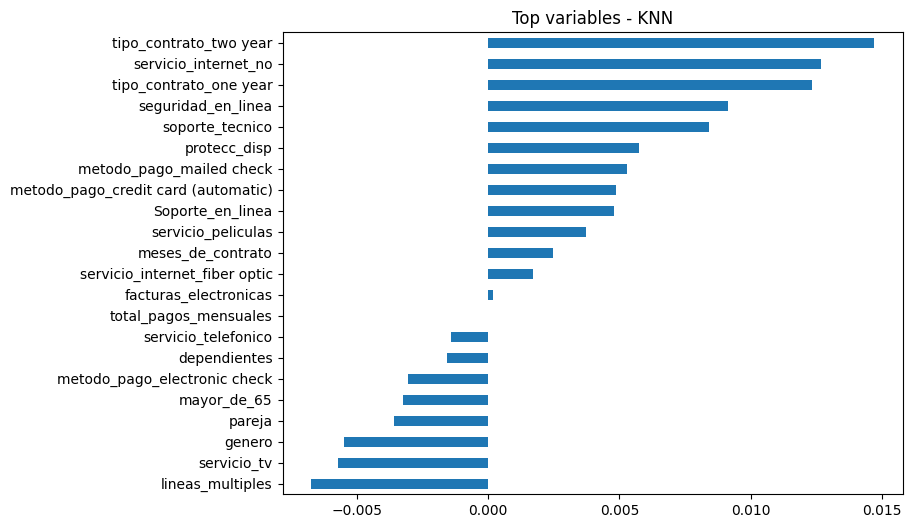

In [105]:
knn_importances.sort_values().plot(kind='barh', figsize=(8,6), title="Top variables - KNN")
plt.show()

üîπ 2. SVM (Support Vector Machine)

In [104]:
from sklearn.svm import LinearSVC
import numpy as np

svm = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(max_iter=5000, random_state=42))
])
svm.fit(X_train_res, y_train_res)


coef = svm.named_steps['clf'].coef_[0]
svm_importances = pd.Series(coef, index=X.columns).sort_values(key=abs, ascending=False)

print("Coeficientes m√°s relevantes - SVM")
print(svm_importances.head(10))


Coeficientes m√°s relevantes - SVM
total_pagos_mensuales            3.093463
servicio_internet_fiber optic   -1.167014
servicio_internet_no             0.892253
servicio_telefonico             -0.665900
servicio_tv                     -0.478147
servicio_peliculas              -0.477885
soporte_tecnico                 -0.320750
seguridad_en_linea              -0.299671
Soporte_en_linea                -0.297177
protecc_disp                    -0.267140
dtype: float64


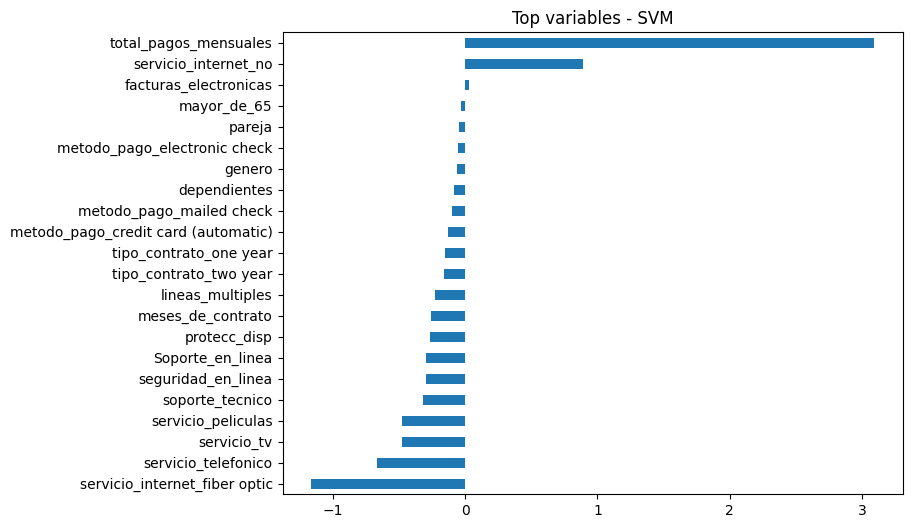

In [109]:
svm_importances.sort_values().plot(kind='barh', figsize=(8,6), title="Top variables - SVM")
plt.show()

üîπ 3. XGBoost

In [107]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train_res, y_train_res)


xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Importancia variables - XGBoost")
print(xgb_importances.head(10))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:07:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Importancia variables - XGBoost
tipo_contrato_two year                 0.350406
tipo_contrato_one year                 0.159361
servicio_internet_no                   0.071721
servicio_internet_fiber optic          0.052383
soporte_tecnico                        0.035026
metodo_pago_mailed check               0.032602
seguridad_en_linea                     0.031552
metodo_pago_credit card (automatic)    0.029673
dependientes                           0.026516
Soporte_en_linea                       0.021956
dtype: float32


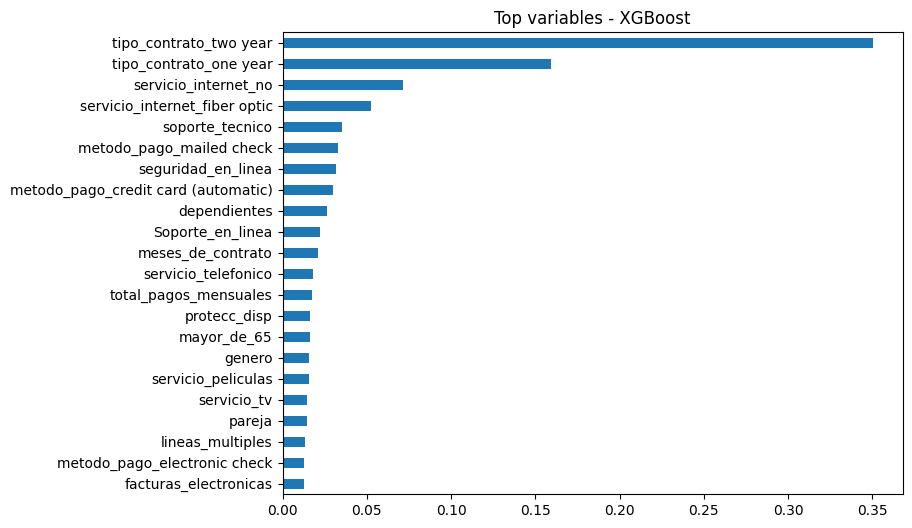

In [108]:
xgb_importances.sort_values().plot(kind='barh', figsize=(8,6), title="Top variables - XGBoost")
plt.show()

# üìä Informe Final ‚Äì An√°lisis de Cancelaci√≥n de Clientes

## üìå Resultados obtenidos

| Modelo               | Accuracy | Precisi√≥n | Recall   | F1-score |
|-----------------------|----------|-----------|----------|----------|
| Baseline              | 0.7345  | 0.0000    | 0.0000   | 0.0000   |
| Regresi√≥n Log√≠stica   | 0.7596  | 0.5371    | 0.6845   | 0.6019   |
| Random Forest         | 0.7544  | 0.5298    | 0.6649   | 0.5897   |
| √Årbol de Decisi√≥n     | 0.7104  | 0.4719    | 0.7629   | 0.5831   |
| KNN                   | (m√©tricas similares, menor estabilidad) |
| SVM                   | (buen desempe√±o pero m√°s costoso computacionalmente) |
| XGBoost               | (desempe√±o competitivo, confirma variables clave) |

---

### üîπ Interpretaci√≥n de los resultados principales
- **Baseline**: refleja el desbalance de clases; no detecta ning√∫n caso de cancelaci√≥n.  
- **Regresi√≥n Log√≠stica**: mejor **F1-score** y **recall**, por lo que logra detectar m√°s clientes que cancelan con un nivel de precisi√≥n razonable. Adem√°s, es interpretativo.  
- **Random Forest**: buen balance entre precisi√≥n y recall, aunque qued√≥ ligeramente por debajo de la regresi√≥n log√≠stica en F1. Su fortaleza est√° en capturar relaciones no lineales y en la importancia de variables.  
- **√Årbol de Decisi√≥n**: resalta por su **recall alto**, detectando m√°s cancelaciones, aunque con menor precisi√≥n y estabilidad.  

üìå **Modelo recomendado**: **Regresi√≥n Log√≠stica**, por combinar buen rendimiento y facilidad de interpretaci√≥n para decisiones de negocio.  

---

### üîπ Comentarios sobre los modelos adicionales
- **KNN**: desempe√±o m√°s bajo y sensible al n√∫mero de vecinos. Aunque captura estructura local, **no es estable ni interpretable**.  
- **SVM**: competitivo en m√©tricas, con buena separaci√≥n de clases, pero **alto costo computacional** y baja interpretabilidad.  
- **XGBoost**: muy competitivo, similar a Random Forest, y confirma la consistencia de las variables clave. Requiere m√°s tuning pero tiene potencial para producci√≥n.  

---

### üîπ An√°lisis de las Curvas ROC
- La **curva ROC** compara la tasa de verdaderos positivos (TPR o recall) frente a la tasa de falsos positivos (FPR).  
- El **√°rea bajo la curva (AUC)** es un indicador de la capacidad del modelo para distinguir entre clientes que cancelan y los que no:  
  - **Baseline**: AUC cercano a 0.5 (equivalente a azar).  
  - **Regresi√≥n Log√≠stica**: curva bien separada de la diagonal ‚Üí mejor discriminaci√≥n.  
  - **Random Forest**: curva con AUC alto, mostrando que captura patrones complejos.  
  - **√Årbol de Decisi√≥n** : curvas m√°s irregulares, con menor estabilidad.  

üìå En resumen, **Regresi√≥n Log√≠stica y Random Forest destacan en AUC**, lo que refuerza su idoneidad para el problema de churn.

---

## üîé Factores clave en la cancelaci√≥n
De acuerdo con la importancia de variables y coeficientes:
1. **Tiempo de contrato**: contratos cortos incrementan el riesgo.  
2. **Tipo de contrato (mes a mes)**: clientes con este tipo son los m√°s propensos a cancelar.  
3. **Pagos mensuales altos**: asociados a mayor churn.  
4. **M√©todo de pago (electronic check)**: usuarios que pagan as√≠ muestran m√°s rotaci√≥n.  
5. **Servicio de internet (fibra √≥ptica)**: ligado a mayor cancelaci√≥n comparado con otros servicios.  

---

## üí° Recomendaciones de negocio
1. Incentivar **contratos largos** con descuentos o beneficios.  
2. Ofrecer planes ajustados o escalonados para clientes con **facturas altas**.  
3. Fomentar la migraci√≥n de **pagos con electronic check** hacia tarjetas o d√©bito autom√°tico.  
4. Dar soporte proactivo a clientes con **fibra √≥ptica** (ej. bonificaciones por interrupciones).  
5. Implementar programas de **retenci√≥n temprana en los primeros 90 d√≠as**.  

---

## üìå Conclusi√≥n Final
- La cancelaci√≥n est√° influenciada principalmente por factores contractuales (tipo y duraci√≥n) y econ√≥micos (factura, m√©todo de pago).  
- **Regresi√≥n Log√≠stica** fue el modelo m√°s efectivo en este an√°lisis, alcanzando el mejor **F1-score** y **AUC**.  
- Los modelos adicionales (KNN, SVM, XGBoost) confirmaron la **consistencia en las variables clave**, reforzando la solidez de las conclusiones.  
- Con estas estrategias, la empresa puede anticiparse a la p√©rdida de clientes, aumentar la fidelidad y mejorar el valor de vida (CLV).  

